## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [10]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import keras.backend as K
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [11]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping
Pati = [10, 25]
Moni = ["val_loss", "val_accuracy"]

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i, (patience, monitor) in enumerate(itertools.product(Pati, Moni)):
    K.clear_session()
    earlystop = EarlyStopping(monitor=monitor, 
                              patience=patience,
                              verbose=1)
    print("Numbers of exp: %i, with monitor: %s, patience: %d" % (i+1, monitor, patience))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop])
    
    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

Numbers of exp: 1, with monitor: val_loss, patience: 10
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
________________________________________________________________

49/49 [==============================] - 2s 49ms/step - loss: 1.5439 - accuracy: 0.4601 - val_loss: 1.6991 - val_accuracy: 0.4147
Epoch 5/50
49/49 [==============================] - 2s 48ms/step - loss: 1.4893 - accuracy: 0.4794 - val_loss: 1.6350 - val_accuracy: 0.4296
Epoch 6/50
49/49 [==============================] - 2s 48ms/step - loss: 1.4449 - accuracy: 0.4939 - val_loss: 1.5860 - val_accuracy: 0.4457
Epoch 7/50
49/49 [==============================] - 2s 48ms/step - loss: 1.4047 - accuracy: 0.5083 - val_loss: 1.5427 - val_accuracy: 0.4586
Epoch 8/50
49/49 [==============================] - 2s 48ms/step - loss: 1.3688 - accuracy: 0.5218 - val_loss: 1.5140 - val_accuracy: 0.4652
Epoch 9/50
49/49 [==============================] - 2s 48ms/step - loss: 1.3370 - accuracy: 0.5324 - val_loss: 1.5017 - val_accuracy: 0.4696
Epoch 10/50
49/49 [==============================] - 2s 48ms/step - loss: 1.3055 - accuracy: 0.5441 - val_loss: 1.4872 - val_accuracy: 0.4763
Epoch 11/50
49/49 [====

49/49 [==============================] - 3s 53ms/step - loss: 1.7583 - accuracy: 0.3872 - val_loss: 1.9697 - val_accuracy: 0.2983
Epoch 3/50
49/49 [==============================] - 2s 50ms/step - loss: 1.6336 - accuracy: 0.4265 - val_loss: 1.8223 - val_accuracy: 0.3561
Epoch 4/50
49/49 [==============================] - 2s 49ms/step - loss: 1.5560 - accuracy: 0.4554 - val_loss: 1.7244 - val_accuracy: 0.3974
Epoch 5/50
49/49 [==============================] - 2s 51ms/step - loss: 1.4996 - accuracy: 0.4741 - val_loss: 1.6412 - val_accuracy: 0.4297
Epoch 6/50
49/49 [==============================] - 2s 50ms/step - loss: 1.4559 - accuracy: 0.4918 - val_loss: 1.5903 - val_accuracy: 0.4413
Epoch 7/50
49/49 [==============================] - 2s 50ms/step - loss: 1.4150 - accuracy: 0.5059 - val_loss: 1.5469 - val_accuracy: 0.4567
Epoch 8/50
49/49 [==============================] - 3s 51ms/step - loss: 1.3801 - accuracy: 0.5188 - val_loss: 1.5303 - val_accuracy: 0.4613
Epoch 9/50
49/49 [======

Epoch 1/50
49/49 [==============================] - 3s 54ms/step - loss: 2.2366 - accuracy: 0.2688 - val_loss: 2.1381 - val_accuracy: 0.2022
Epoch 2/50
49/49 [==============================] - 2s 50ms/step - loss: 1.7461 - accuracy: 0.3940 - val_loss: 1.9685 - val_accuracy: 0.2861
Epoch 3/50
49/49 [==============================] - 2s 49ms/step - loss: 1.6197 - accuracy: 0.4340 - val_loss: 1.8139 - val_accuracy: 0.3690
Epoch 4/50
49/49 [==============================] - 2s 49ms/step - loss: 1.5453 - accuracy: 0.4605 - val_loss: 1.7036 - val_accuracy: 0.4052
Epoch 5/50
49/49 [==============================] - 2s 49ms/step - loss: 1.4927 - accuracy: 0.4789 - val_loss: 1.6432 - val_accuracy: 0.4293
Epoch 6/50
49/49 [==============================] - 2s 51ms/step - loss: 1.4477 - accuracy: 0.4958 - val_loss: 1.5967 - val_accuracy: 0.4392
Epoch 7/50
49/49 [==============================] - 2s 49ms/step - loss: 1.4078 - accuracy: 0.5102 - val_loss: 1.5496 - val_accuracy: 0.4534
Epoch 8/50
49

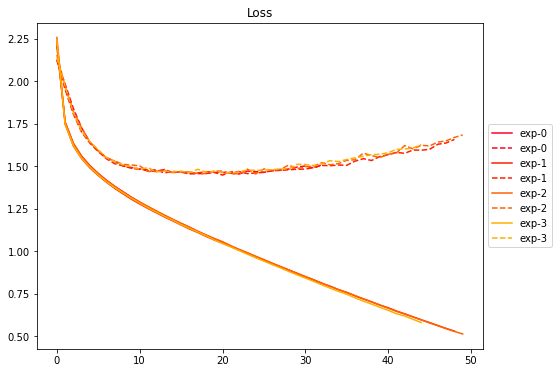

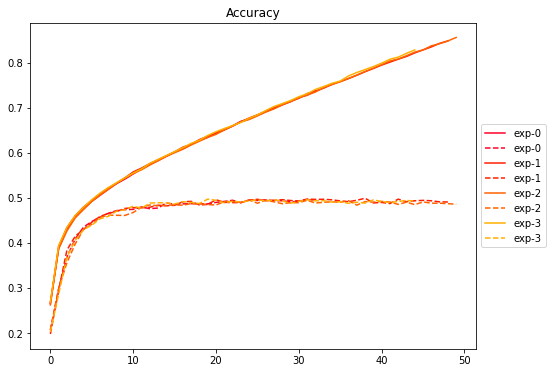

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()